In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:

model_path = "ckpts/sft_mmlu_llama7B/checkpoint_01000/hf_model/"

sft_eval_A_to_D_probs = np.load(model_path + "eval_A_to_D_probs.npy") 


sft_eval_correct_preds = np.load(model_path + "eval_correct_preds.npy")


(array([480., 240.,  93.,  47.,  20.,  21.,   8.,   5.,   3.,   4.]),
 array([0.25480291, 0.32826963, 0.40173635, 0.47520308, 0.5486698 ,
        0.62213652, 0.69560324, 0.76906996, 0.84253668, 0.9160034 ,
        0.98947012]),
 <BarContainer object of 10 artists>)

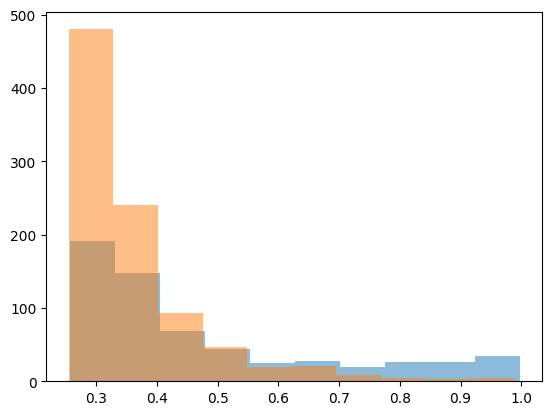

In [52]:
correct_idxs  = np.where(sft_eval_correct_preds == 1)[0]
incorrect_idxs = np.where(sft_eval_correct_preds == 0)[0]

plt.hist(sft_eval_A_to_D_probs.max(-1)[correct_idxs], alpha=0.5, label="correct")
plt.hist(sft_eval_A_to_D_probs.max(-1)[incorrect_idxs], alpha=0.5, label="incorrect")

In [53]:
# probability_bins = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
probability_bins = [0.2, 0.4, 0.6, 0.8,1]

probabitities = []
accuracies = []
for i in range(len(probability_bins) - 1):
    bin_idxs = np.where((sft_eval_A_to_D_probs.max(-1) > probability_bins[i]) & (sft_eval_A_to_D_probs.max(-1) < probability_bins[i+1]))[0]
    print("Bin: ", probability_bins[i], probability_bins[i+1], "Accuracy: ", np.mean(sft_eval_correct_preds[bin_idxs]))
    probabitities.append(sft_eval_A_to_D_probs.max(-1)[bin_idxs].mean())
    accuracies.append(np.mean(sft_eval_correct_preds[bin_idxs]))


Bin:  0.2 0.4 Accuracy:  0.3154875717017208
Bin:  0.4 0.6 Accuracy:  0.4713804713804714
Bin:  0.6 0.8 Accuracy:  0.6176470588235294
Bin:  0.8 1 Accuracy:  0.8953488372093024


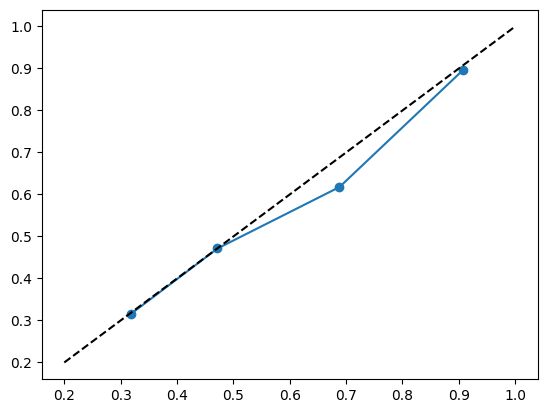

In [54]:
plt.plot(probabitities, accuracies, "o-")
plt.plot([0.2, 1], [0.2, 1], "k--")

(array([ 58.,  44.,  41.,  59.,  70.,  99., 174., 270., 405., 311.]),
 array([0.00292514, 0.13935912, 0.2757931 , 0.41222708, 0.54866105,
        0.68509503, 0.82152901, 0.95796299, 1.09439697, 1.23083095,
        1.36726492]),
 <BarContainer object of 10 artists>)

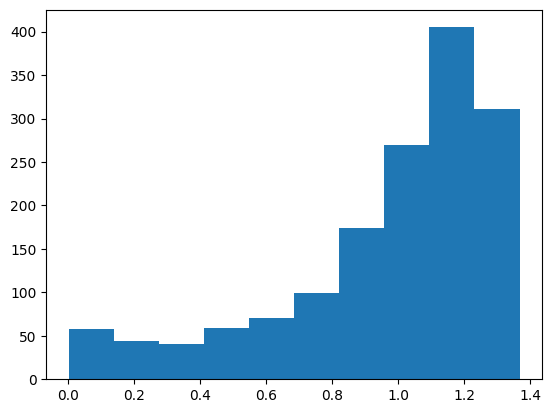

In [57]:
neg_log_likelihoods = -np.log(sft_eval_A_to_D_probs.max(-1))

plt.hist(neg_log_likelihoods)

In [32]:
model_path = "ckpts/sft_mmlu_llama7B/checkpoint_01000/hf_model/"

sft_eval_A_to_D_probs = np.load(model_path + "eval_A_to_D_probs.npy") 
neg_log_likelihoods = -np.log(sft_eval_A_to_D_probs.max(-1))


model_path = "ckpts/sft_mmlu_llama7B/checkpoint_05000/hf_model/"

# model_path = "ckpts/sft2_mmlu_llama7B_threshold0pt5_certainABCD/checkpoint_05000/hf_model/"
# model_path = "ckpts/sft2_mmlu_llama7B_threshold0pt5/checkpoint_08000/hf_model/"
# model_path = "ckpts/sft2_mmlu_llama7B_threshold0pt6_balanced/checkpoint_06000/hf_model/"

sft2_eval_A_to_D_probs = np.load(model_path + "eval_A_to_D_probs.npy") 
sft2_neg_log_likelihoods = -np.log(sft2_eval_A_to_D_probs.max(-1))

In [33]:

neg_log_likelihood_bins = [0, 0.2, 0.4, 0.6, 0.9, 1.1, 1.2, 1.3, 1.4]
# neg_log_likelihood_bins = []
# for percentiles in np.arange(0, 100, 5):
#     print("Percentile: ", percentiles, np.percentile(neg_log_likelihoods, percentiles))
#     neg_log_likelihood_bins.append(np.percentile(neg_log_likelihoods, percentiles))

neg_log_likelihoods_bin_means = []

A_to_D_likelihoods = {}
A_to_D_likelihoods["A"] = []
A_to_D_likelihoods["B"] = []
A_to_D_likelihoods["C"] = []
A_to_D_likelihoods["D"] = []

A_to_D_likelihood_stds = {}
A_to_D_likelihood_stds["A"] = []
A_to_D_likelihood_stds["B"] = []
A_to_D_likelihood_stds["C"] = []
A_to_D_likelihood_stds["D"] = []
for i in range(len(neg_log_likelihood_bins) - 1):
    bin_idxs = np.where((neg_log_likelihoods > neg_log_likelihood_bins[i]) & (neg_log_likelihoods < neg_log_likelihood_bins[i+1]))[0]
    A_to_D_likelihoods["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].mean())
    A_to_D_likelihoods["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].mean())
    A_to_D_likelihoods["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].mean())
    A_to_D_likelihoods["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].mean())

    A_to_D_likelihood_stds["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].std())
    A_to_D_likelihood_stds["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].std())
    A_to_D_likelihood_stds["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].std())
    A_to_D_likelihood_stds["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].std())
    neg_log_likelihoods_bin_means.append(neg_log_likelihoods[bin_idxs].mean())


In [34]:
(np.array(A_to_D_likelihoods["A"])+np.array(A_to_D_likelihoods["D"]))/2

array([0.20488551, 0.1754979 , 0.16667086, 0.22695432, 0.25672775,
       0.24678158, 0.23979488, 0.24305868])

Text(0.5, 1.0, 'MMLU Uniform SFT')

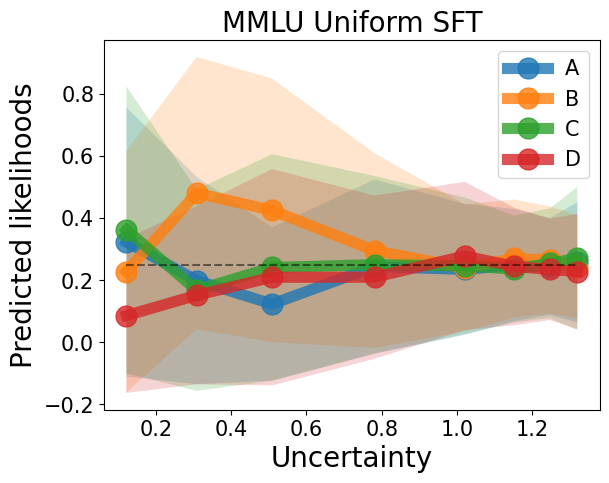

In [35]:
# plt.errorbar(probabitities, A_to_D_likelihoods["A"], yerr=A_to_D_likelihood_stds["A"], label="A")
# plt.errorbar(probabitities, A_to_D_likelihoods["B"], yerr=A_to_D_likelihood_stds["B"], label="B")
# plt.errorbar(probabitities, A_to_D_likelihoods["C"], yerr=A_to_D_likelihood_stds["C"], label="C")
# plt.errorbar(probabitities, A_to_D_likelihoods["D"], yerr=A_to_D_likelihood_stds["D"], label="D")

plt.plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["A"], "o-", label="A", linewidth=8, markersize=15, alpha=0.8)
plt.fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["A"]) - np.array(A_to_D_likelihood_stds["A"]), np.array(A_to_D_likelihoods["A"]) + np.array(A_to_D_likelihood_stds["A"]), alpha=0.2)
plt.plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["B"], "o-", label="B", linewidth=8, markersize=15, alpha=0.8)
plt.fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["B"]) - np.array(A_to_D_likelihood_stds["B"]), np.array(A_to_D_likelihoods["B"]) + np.array(A_to_D_likelihood_stds["B"]), alpha=0.2)
plt.plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["C"], "o-", label="C", linewidth=8, markersize=15, alpha=0.8)
plt.fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["C"]) - np.array(A_to_D_likelihood_stds["C"]), np.array(A_to_D_likelihoods["C"]) + np.array(A_to_D_likelihood_stds["C"]), alpha=0.2)
plt.plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["D"], "o-", label="D", linewidth=8, markersize=15, alpha=0.8)
plt.fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["D"]) - np.array(A_to_D_likelihood_stds["D"]), np.array(A_to_D_likelihoods["D"]) + np.array(A_to_D_likelihood_stds["D"]), alpha=0.2)

plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.hlines([0.25], neg_log_likelihoods_bin_means[0], neg_log_likelihoods_bin_means[-1], linestyles="--", color="black", alpha=0.5)

plt.xlabel("Uncertainty", fontsize=20)
plt.ylabel("Predicted likelihoods", fontsize=20)
plt.title("MMLU Uniform SFT", fontsize=20)

In [117]:
# from datasets import load_dataset

# topics = ['abstract_algebra', 'anatomy', 'astronomy', 'business_ethics', 'clinical_knowledge', 'college_biology', 'college_chemistry', 'college_computer_science', 'college_mathematics', 'college_medicine', 'college_physics', 'computer_security', 'conceptual_physics', 'econometrics', 'electrical_engineering', 'elementary_mathematics', 'formal_logic', 'global_facts', 'high_school_biology', 'high_school_chemistry', 'high_school_computer_science', 'high_school_european_history', 'high_school_geography', 'high_school_government_and_politics', 'high_school_macroeconomics', 'high_school_mathematics', 'high_school_microeconomics', 'high_school_physics', 'high_school_psychology', 'high_school_statistics', 'high_school_us_history', 'high_school_world_history', 'human_aging', 'human_sexuality', 'international_law', 'jurisprudence', 'logical_fallacies', 'machine_learning', 'management', 'marketing', 'medical_genetics', 'miscellaneous', 'moral_disputes', 'moral_scenarios', 'nutrition', 'philosophy', 'prehistory', 'professional_accounting', 'professional_law', 'professional_medicine', 'professional_psychology', 'public_relations', 'security_studies', 'sociology', 'us_foreign_policy', 'virology', 'world_religions']

# # test_questions = []
# # test_choices = []
# test_answers = []
# for topic in topics:
#     dataset = load_dataset("tasksource/mmlu", topic)
#     # test_questions.append(dataset["validation"]["question"])
#     # test_choices.append(dataset["validation"]["choices"])
#     test_answers.append(dataset["validation"]["answer"])
# # test_questions = np.concatenate(test_questions)
# # test_choices = np.concatenate(test_choices)
# test_answers = np.concatenate(test_answers)

In [203]:
# A_idxs = np.where(test_answers==0)[0]
# B_idxs = np.where(test_answers==1)[0]
# C_idxs = np.where(test_answers==2)[0]
# D_idxs = np.where(test_answers==3)[0]
test_answers

array(['C', 'B', 'C', ..., 'C', 'B', 'A'], dtype='<U1')

/tmp/ipykernel_19628/3175511701.py:46: RuntimeWarning: Mean of empty slice.
  A_to_D_likelihoods["A"].append(sft2_eval_A_to_D_probs[idxs][bin_idxs, 0].mean())
/data/katie_kang/miniconda3/envs/trlx/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_19628/3175511701.py:47: RuntimeWarning: Mean of empty slice.
  A_to_D_likelihoods["B"].append(sft2_eval_A_to_D_probs[idxs][bin_idxs, 1].mean())
/tmp/ipykernel_19628/3175511701.py:48: RuntimeWarning: Mean of empty slice.
  A_to_D_likelihoods["C"].append(sft2_eval_A_to_D_probs[idxs][bin_idxs, 2].mean())
/tmp/ipykernel_19628/3175511701.py:49: RuntimeWarning: Mean of empty slice.
  A_to_D_likelihoods["D"].append(sft2_eval_A_to_D_probs[idxs][bin_idxs, 3].mean())
/data/katie_kang/miniconda3/envs/trlx/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dty

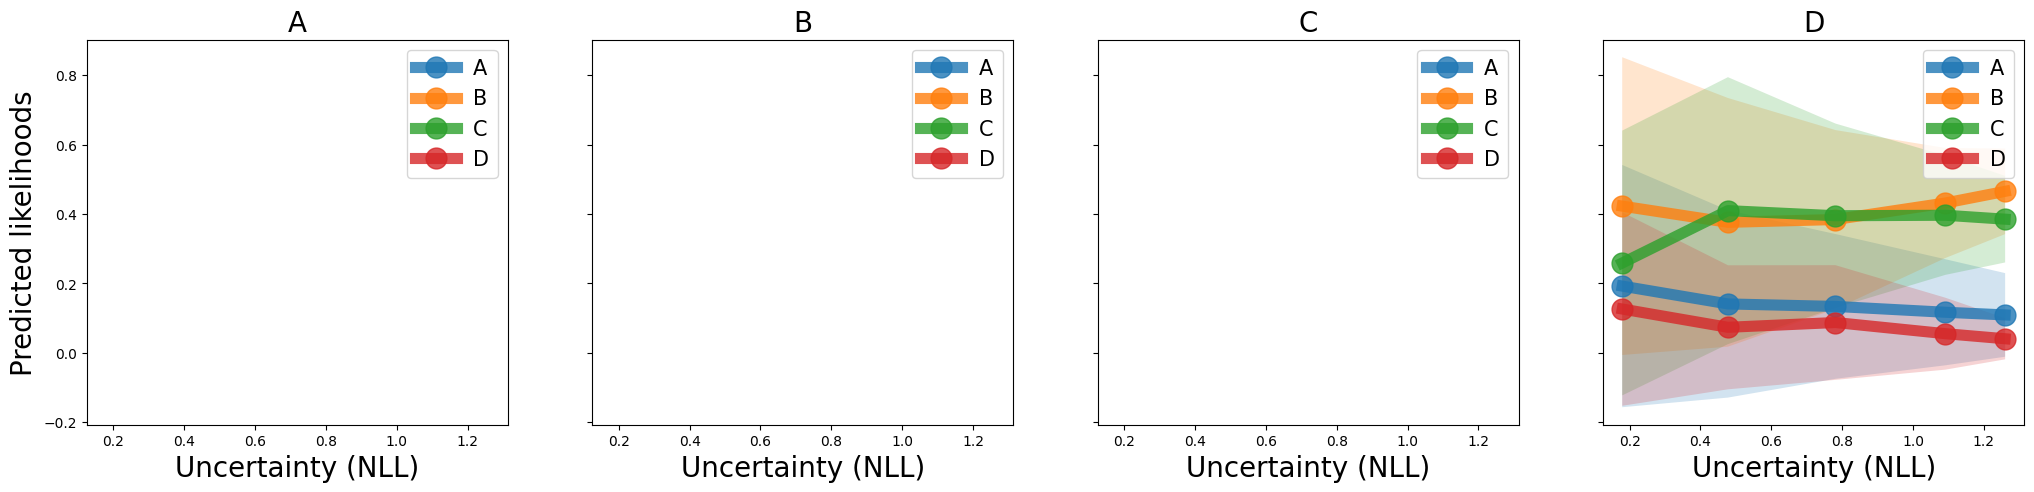

In [6]:

model_path = "ckpts/sft_mmlu_llama7B/checkpoint_01000/hf_model/"

sft_eval_A_to_D_probs = np.load(model_path + "eval_A_to_D_probs.npy") 
neg_log_likelihoods = -np.log(sft_eval_A_to_D_probs.max(-1))

# model_path = "ckpts/sft2_mmlu_llama7B_threshold0pt5_lr3e-6_certainABCD/checkpoint_04000/hf_model/"
# model_path = "ckpts/sft_mmlu_llama7B/checkpoint_02000/hf_model/"
# model_path = "ckpts/sft2_mmlu_llama7B_threshold0pt5_certainABCD/checkpoint_02000/hf_model/"
# model_path = "ckpts/sft2_mmlu_llama7B_threshold0pt5/checkpoint_01000/hf_model/"
model_path = "ckpts/sft2_mmlu_llama7B_threshold0pt5_certainABCD/checkpoint_01000/hf_model/"


sft2_eval_A_to_D_probs = np.load(model_path + "eval_A_to_D_probs.npy") 
sft2_neg_log_likelihoods = -np.log(sft2_eval_A_to_D_probs.max(-1))

test_answers = np.load(model_path + "eval_answers.npy")
fig, axs = plt.subplots(1, 4, figsize=(25, 5), sharey=True, sharex=True)


neg_log_likelihood_bins = [0, 0.3, 0.6, 0.9, 1.2, 1.5]
# neg_log_likelihood_bins = []
# for percentiles in [0, 10, 40, 60, 90, 100]:
#     print("Percentile: ", percentiles, np.percentile(neg_log_likelihoods, percentiles))
#     neg_log_likelihood_bins.append(np.percentile(neg_log_likelihoods, percentiles))

labels = ["A", "B", "C", "D"]

for j in range(4):

    idxs = np.where(test_answers==labels[j])[0]
    neg_log_likelihoods_bin_means = []

    A_to_D_likelihoods = {}
    A_to_D_likelihoods["A"] = []
    A_to_D_likelihoods["B"] = []
    A_to_D_likelihoods["C"] = []
    A_to_D_likelihoods["D"] = []

    A_to_D_likelihood_stds = {}
    A_to_D_likelihood_stds["A"] = []
    A_to_D_likelihood_stds["B"] = []
    A_to_D_likelihood_stds["C"] = []
    A_to_D_likelihood_stds["D"] = []
    for i in range(len(neg_log_likelihood_bins) - 1):
        bin_idxs = np.where((neg_log_likelihoods[idxs] > neg_log_likelihood_bins[i]) & (neg_log_likelihoods[idxs] < neg_log_likelihood_bins[i+1]))[0]
        A_to_D_likelihoods["A"].append(sft2_eval_A_to_D_probs[idxs][bin_idxs, 0].mean())
        A_to_D_likelihoods["B"].append(sft2_eval_A_to_D_probs[idxs][bin_idxs, 1].mean())
        A_to_D_likelihoods["C"].append(sft2_eval_A_to_D_probs[idxs][bin_idxs, 2].mean())
        A_to_D_likelihoods["D"].append(sft2_eval_A_to_D_probs[idxs][bin_idxs, 3].mean())

        A_to_D_likelihood_stds["A"].append(sft2_eval_A_to_D_probs[idxs][bin_idxs, 0].std())
        A_to_D_likelihood_stds["B"].append(sft2_eval_A_to_D_probs[idxs][bin_idxs, 1].std())
        A_to_D_likelihood_stds["C"].append(sft2_eval_A_to_D_probs[idxs][bin_idxs, 2].std())
        A_to_D_likelihood_stds["D"].append(sft2_eval_A_to_D_probs[idxs][bin_idxs, 3].std())
        neg_log_likelihoods_bin_means.append(neg_log_likelihoods[idxs][bin_idxs].mean())
    
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["A"], "o-", label="A", linewidth=8, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["A"]) - np.array(A_to_D_likelihood_stds["A"]), np.array(A_to_D_likelihoods["A"]) + np.array(A_to_D_likelihood_stds["A"]), alpha=0.2)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["B"], "o-", label="B", linewidth=8, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["B"]) - np.array(A_to_D_likelihood_stds["B"]), np.array(A_to_D_likelihoods["B"]) + np.array(A_to_D_likelihood_stds["B"]), alpha=0.2)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["C"], "o-", label="C", linewidth=8, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["C"]) - np.array(A_to_D_likelihood_stds["C"]), np.array(A_to_D_likelihoods["C"]) + np.array(A_to_D_likelihood_stds["C"]), alpha=0.2)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["D"], "o-", label="D", linewidth=8, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["D"]) - np.array(A_to_D_likelihood_stds["D"]), np.array(A_to_D_likelihoods["D"]) + np.array(A_to_D_likelihood_stds["D"]), alpha=0.2)

    axs[j].legend(fontsize=15)
    # axs[j].set_xticks(fontsize=15)
    # axs[j].set_yticks(fontsize=15)
    axs[j].set_xlabel("Uncertainty (NLL)", fontsize=20)
    if j==0:
        axs[j].set_ylabel("Predicted likelihoods", fontsize=20)
    axs[j].set_title(labels[j], fontsize=20)


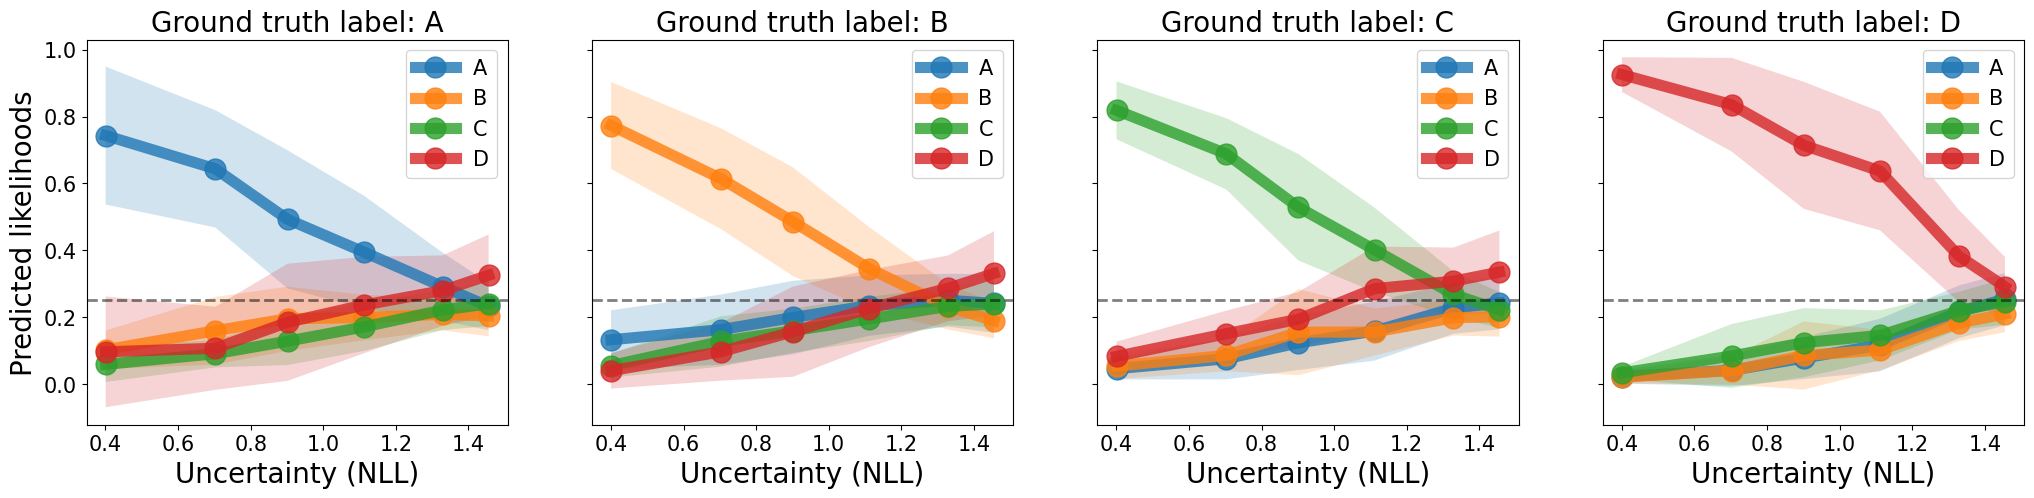

In [43]:

model_path = "ckpts/sft_mmlu_llama7B/checkpoint_01000/hf_model/"

# sft_eval_A_to_D_probs = np.load(model_path + "eval_A_to_D_probs.npy") 
# neg_log_likelihoods = -np.log(sft_eval_A_to_D_probs.max(-1))

sft_eval_A_to_D_probs = (np.load(model_path + f"eval_A_to_D_probs_truthA.npy")[:, 0]+
    np.load(model_path + f"eval_A_to_D_probs_truthB.npy")[:, 1]+
    np.load(model_path + f"eval_A_to_D_probs_truthC.npy")[:, 2]+
    np.load(model_path + f"eval_A_to_D_probs_truthD.npy")[:, 3])/4

neg_log_likelihoods = -np.log(sft_eval_A_to_D_probs)


model_path = "ckpts/sft_mmlu_llama7B/checkpoint_02000/hf_model/"
# model_path = "ckpts/sft2_mmlu_llama7B_threshold0pt5_certainABCD/checkpoint_01000/hf_model/"

fig, axs = plt.subplots(1, 4, figsize=(25, 5), sharey=True, sharex=True)


# neg_log_likelihood_bins = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1]
neg_log_likelihood_bins = [0, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]

# neg_log_likelihood_bins = []
# for percentiles in [0, 5, 10, 20, 40, 60, 100]:
#     print("Percentile: ", percentiles, np.percentile(neg_log_likelihoods, percentiles))
#     neg_log_likelihood_bins.append(np.percentile(neg_log_likelihoods, percentiles))

labels = ["A", "B", "C", "D"]

for j in range(4):

    sft2_eval_A_to_D_probs = np.load(model_path + f"eval_A_to_D_probs_truth{labels[j]}.npy")
    sft2_neg_log_likelihoods = -np.log(sft2_eval_A_to_D_probs.max(-1))

    neg_log_likelihoods_bin_means = []

    A_to_D_likelihoods = {}
    A_to_D_likelihoods["A"] = []
    A_to_D_likelihoods["B"] = []
    A_to_D_likelihoods["C"] = []
    A_to_D_likelihoods["D"] = []

    A_to_D_likelihood_stds = {}
    A_to_D_likelihood_stds["A"] = []
    A_to_D_likelihood_stds["B"] = []
    A_to_D_likelihood_stds["C"] = []
    A_to_D_likelihood_stds["D"] = []
    for i in range(len(neg_log_likelihood_bins) - 1):
        bin_idxs = np.where((neg_log_likelihoods > neg_log_likelihood_bins[i]) & (neg_log_likelihoods < neg_log_likelihood_bins[i+1]))[0]
        A_to_D_likelihoods["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].mean())
        A_to_D_likelihoods["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].mean())
        A_to_D_likelihoods["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].mean())
        A_to_D_likelihoods["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].mean())

        A_to_D_likelihood_stds["A"].append(sft2_eval_A_to_D_probs[bin_idxs, 0].std())
        A_to_D_likelihood_stds["B"].append(sft2_eval_A_to_D_probs[bin_idxs, 1].std())
        A_to_D_likelihood_stds["C"].append(sft2_eval_A_to_D_probs[bin_idxs, 2].std())
        A_to_D_likelihood_stds["D"].append(sft2_eval_A_to_D_probs[bin_idxs, 3].std())
        neg_log_likelihoods_bin_means.append(neg_log_likelihoods[bin_idxs].mean())
    
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["A"], "o-", label="A", linewidth=8, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["A"]) - np.array(A_to_D_likelihood_stds["A"]), np.array(A_to_D_likelihoods["A"]) + np.array(A_to_D_likelihood_stds["A"]), alpha=0.2)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["B"], "o-", label="B", linewidth=8, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["B"]) - np.array(A_to_D_likelihood_stds["B"]), np.array(A_to_D_likelihoods["B"]) + np.array(A_to_D_likelihood_stds["B"]), alpha=0.2)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["C"], "o-", label="C", linewidth=8, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["C"]) - np.array(A_to_D_likelihood_stds["C"]), np.array(A_to_D_likelihoods["C"]) + np.array(A_to_D_likelihood_stds["C"]), alpha=0.2)
    axs[j].plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["D"], "o-", label="D", linewidth=8, markersize=15, alpha=0.8)
    axs[j].fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["D"]) - np.array(A_to_D_likelihood_stds["D"]), np.array(A_to_D_likelihoods["D"]) + np.array(A_to_D_likelihood_stds["D"]), alpha=0.2)

    axs[j].legend(fontsize=15)
    axs[j].axhline(0.25, linestyle = "--" ,color = "black",  linewidth=2, alpha=0.5)
    # axs[j].axhline(0, linestyle = "--" ,color = "black",  linewidth=1.5, alpha=0.8)

    # axs[j].set_xticklabels(fontsize=15)
    axs[j].set_yticks([0 ,0.2, 0.4, 0.6, 0.8, 1],)
    axs[j].xaxis.set_tick_params(labelsize=15)
    axs[j].yaxis.set_tick_params(labelsize=15)
    axs[j].set_xlabel("Uncertainty (NLL)", fontsize=20)
    if j==0:
        axs[j].set_ylabel("Predicted likelihoods", fontsize=20)
    axs[j].set_title("Ground truth label: "+labels[j], fontsize=20)


In [26]:
np.load(model_path + f"eval_A_to_D_probs_truthD.npy").shape

(512, 4)

(array([ 13.,  49.,  98., 708., 636.,  25.,   1.,   0.,   0.,   1.]),
 array([0.04081924, 0.3886587 , 0.73649817, 1.08433763, 1.43217709,
        1.78001655, 2.12785601, 2.47569547, 2.82353493, 3.1713744 ,
        3.51921386]),
 <BarContainer object of 10 artists>)

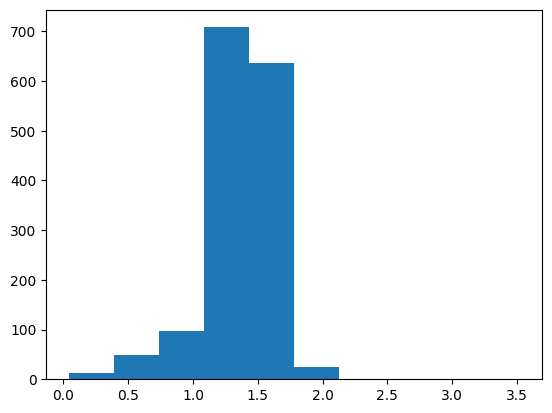

In [9]:
plt.hist(neg_log_likelihoods)

In [130]:
np.median(neg_log_likelihoods)

0.5682132682795331

(array([ 36., 124., 388., 405., 291.,  91.,  47.,  60.,  49.,  40.]),
 array([0.33402511, 0.40002802, 0.46603092, 0.53203382, 0.59803672,
        0.66403963, 0.73004253, 0.79604543, 0.86204833, 0.92805124,
        0.99405414]),
 <BarContainer object of 10 artists>)

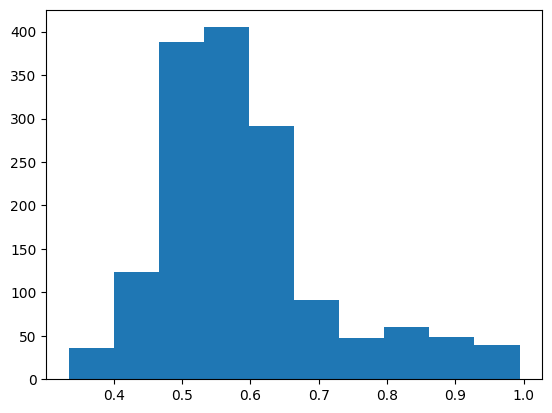

In [131]:
plt.hist(np.e**-neg_log_likelihoods)

In [14]:

idxs = A_idxs
neg_log_likelihoods_bin_means = np.array(neg_log_likelihoods_bin_means)
plt.plot(neg_log_likelihoods_bin_means[idxs], A_to_D_likelihoods["A"][idxs], "o-", label="A", linewidth=8, markersize=15, alpha=0.8)
plt.fill_between(neg_log_likelihoods_bin_means[idxs], np.array(A_to_D_likelihoods["A"])[idxs] - np.array(A_to_D_likelihood_stds["A"])[idxs], np.array(A_to_D_likelihoods["A"])[idxs] + np.array(A_to_D_likelihood_stds["A"])[idxs], alpha=0.2)
# plt.plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["B"], "o-", label="B", linewidth=8, markersize=15, alpha=0.8)
# plt.fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["B"]) - np.array(A_to_D_likelihood_stds["B"]), np.array(A_to_D_likelihoods["B"]) + np.array(A_to_D_likelihood_stds["B"]), alpha=0.2)
# plt.plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["C"], "o-", label="C", linewidth=8, markersize=15, alpha=0.8)
# plt.fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["C"]) - np.array(A_to_D_likelihood_stds["C"]), np.array(A_to_D_likelihoods["C"]) + np.array(A_to_D_likelihood_stds["C"]), alpha=0.2)
# plt.plot(neg_log_likelihoods_bin_means, A_to_D_likelihoods["D"], "o-", label="D", linewidth=8, markersize=15, alpha=0.8)
# plt.fill_between(neg_log_likelihoods_bin_means, np.array(A_to_D_likelihoods["D"]) - np.array(A_to_D_likelihood_stds["D"]), np.array(A_to_D_likelihoods["D"]) + np.array(A_to_D_likelihood_stds["D"]), alpha=0.2)

plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Uncertainty", fontsize=20)
plt.ylabel("Predicted likelihoods", fontsize=20)
plt.title("MMLU Uniform SFT", fontsize=20)

IndexError: index 17 is out of bounds for axis 0 with size 9

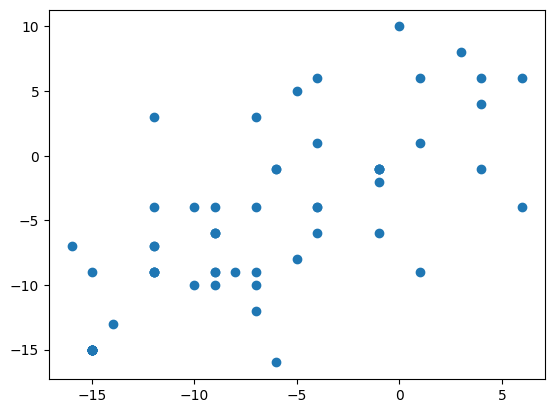

In [82]:
rewards1 = [-13.,  -4.,  -4.,  -9., -15.,  -9.,  -4.,  -9.,  -1.,   8.,  -6.,
         3.,  -7.,   6., -10.,  -4., -15.,   6.,   6.,   1.,  -9., -10.,
        -9., -15.,  -1., -15.,  -1.,  -8.,   3.,  -7.,   5.,  -1.,  -4.,
       -16.,  -9.,  -9.,  10., -15., -15., -10., -15., -15.,   1., -15.,
        -1., -15.,  -2.,  -1., -15.,  -6.,  -9.,   4.,  -7.,  -6.,   6.,
        -6.,  -4., -12.,  -9.,  -9., -15.,  -6.,  -1.,  -4.]

rewards = [-14., -10., -12.,  -7., -15., -15.,  -4., -12.,  -1.,   3.,  -9.,
        -7., -12.,   6., -10.,  -4., -15.,   4.,   1.,   1.,  -9.,  -9.,
       -12., -15.,  -6., -15.,  -1.,  -5., -12., -12.,  -5.,  -1.,   6.,
        -6.,  -9.,  -8.,   0., -15., -15.,  -7., -15., -15.,  -4., -15.,
         4., -15.,  -1.,  -6., -15.,  -4., -12.,   4., -16.,  -1.,  -4.,
        -9.,  -9.,  -7., -12.,   1., -15.,  -9.,  -1.,  -7.]

plt.scatter(rewards, rewards1)